In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
#load the data
housing_data=pd.read_csv('data/Ames_Housing_Sales.csv')
housing_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [3]:
#view the basic info of the data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [4]:
#get the idea about the outliers and whether it needs scalling or not
housing_data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,1177.129804,353.424946,3.609862,2.865120,455.578680,48.102248,0.430747,0.058738,570.765047,21.039159,...,6.187092,2.920957,15.945613,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183,185479.51124
std,387.014961,439.553171,30.154682,0.783961,459.691379,164.324665,0.514052,0.238285,443.677845,60.535107,...,1.345780,41.335545,57.249593,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221,79023.89060
min,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.00000
25%,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,228.000000,0.000000,...,5.000000,0.000000,0.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.00000
50%,1098.000000,0.000000,0.000000,3.000000,400.000000,0.000000,0.000000,0.000000,476.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000,167500.00000
75%,1414.000000,738.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,811.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000,217750.00000
max,4692.000000,2065.000000,508.000000,6.000000,5644.000000,1474.000000,2.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,480.000000,12.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000,755000.00000


In [5]:
mask = housing_data.dtypes == np.object

<ipython-input-5-df64cbfbccda>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = housing_data.dtypes == np.object


In [6]:
#separate categorical and numerical columns
categorical_col = housing_data.dtypes[mask].index
numerical_col = housing_data.dtypes[~mask].index

In [7]:
# create a copy fo data (good practice this way you don't loose original data)
housing_data_copy=housing_data.copy()

###  Visulizations

In [8]:
def scatterplot(data,x,y):
    """
        function takes 
        data : Dataframe
        x : x-axis
        y : y_axis
        
        Returns
        ScatterPlot between x and y
    """
    sns.scatterplot(data=housing_data_copy,x=x,y=y)
    plt.title("Plot Between "+x+" And Sales Price")
    return plt.show()

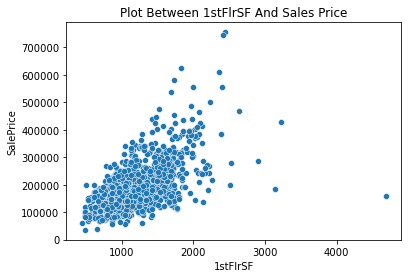

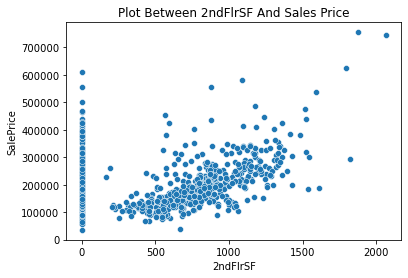

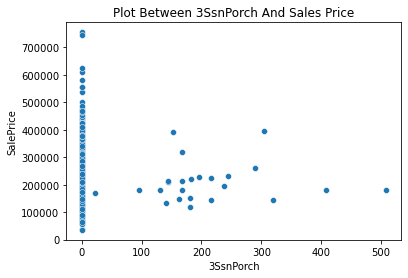

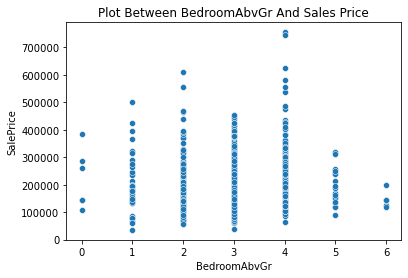

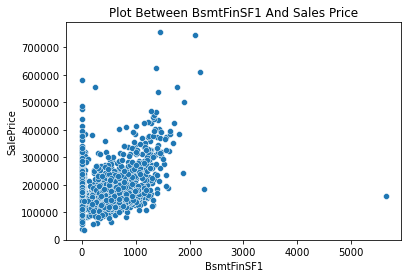

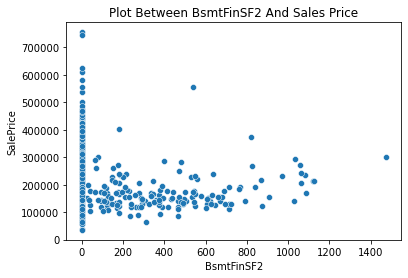

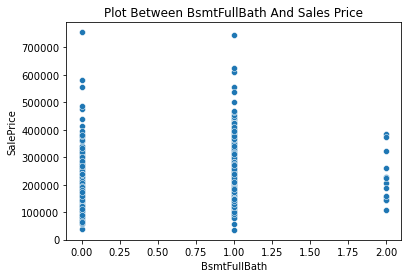

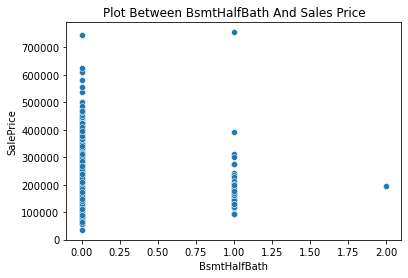

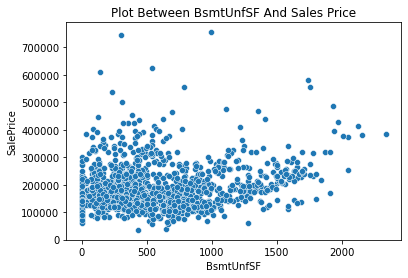

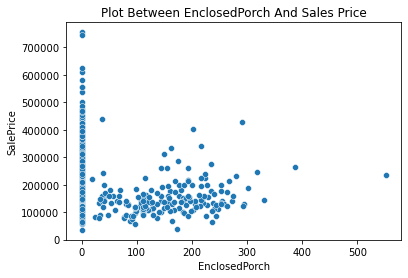

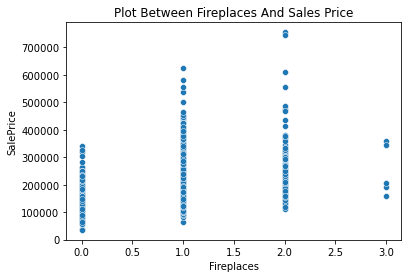

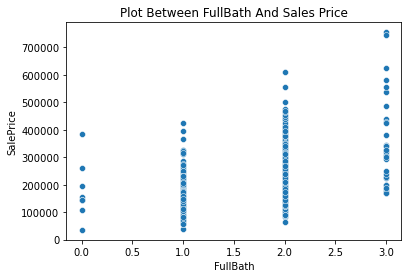

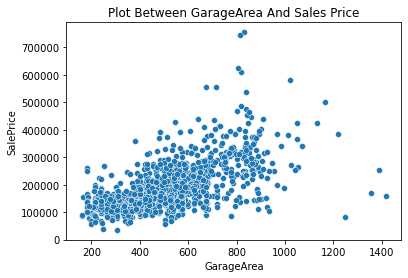

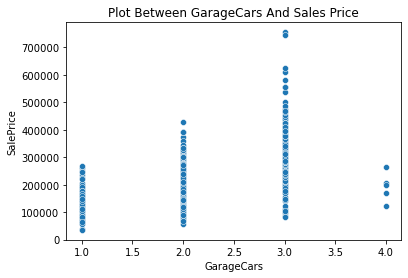

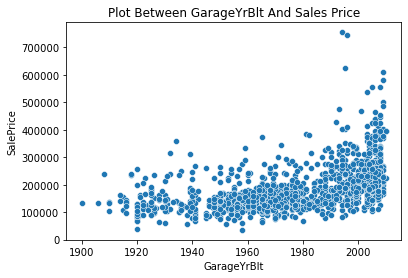

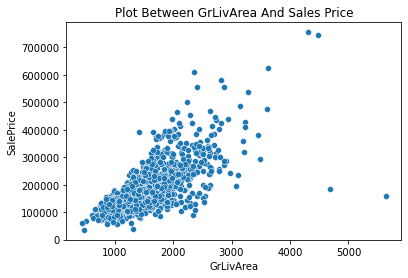

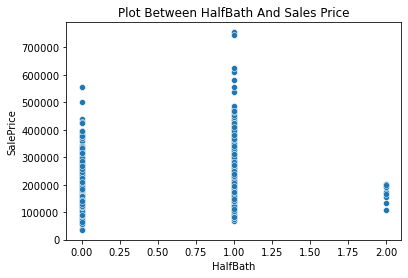

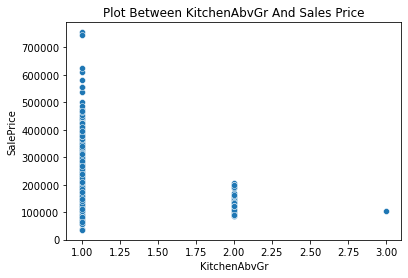

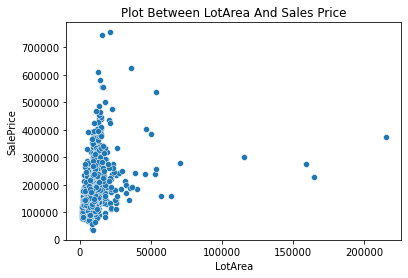

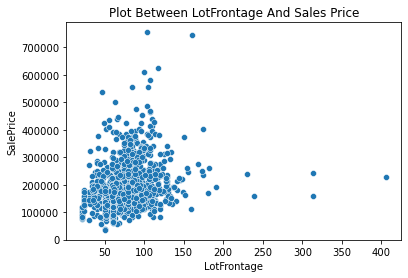

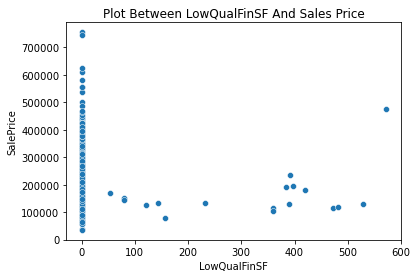

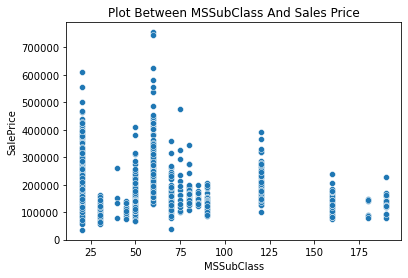

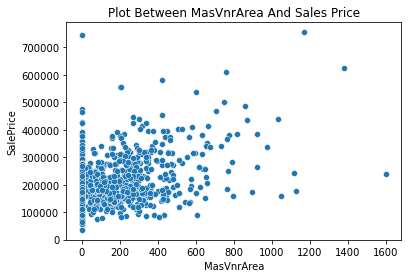

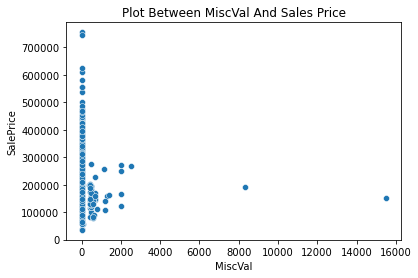

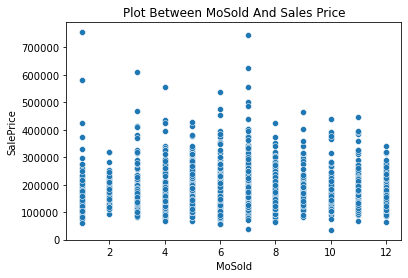

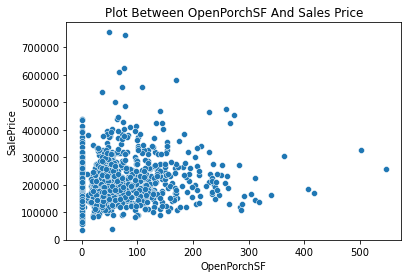

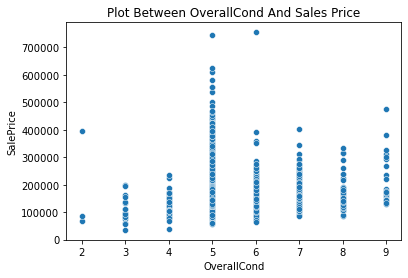

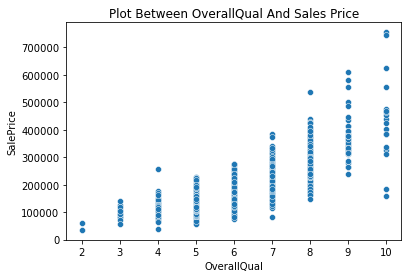

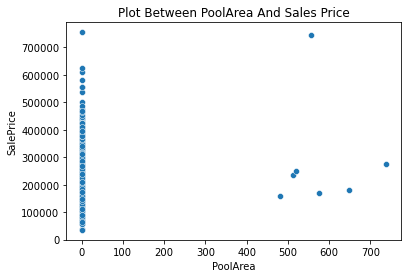

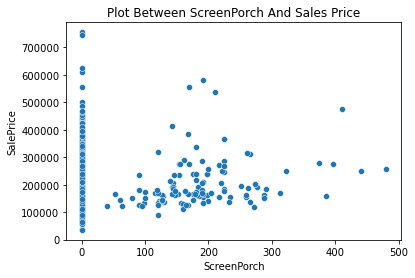

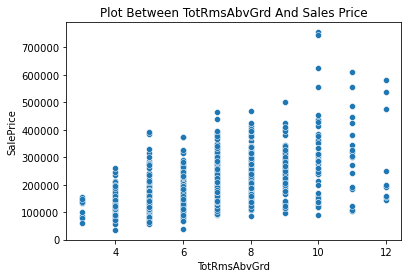

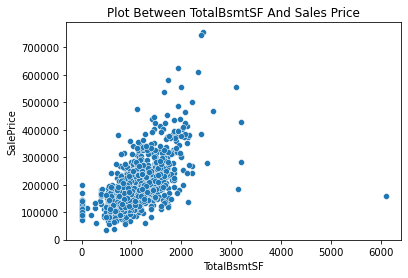

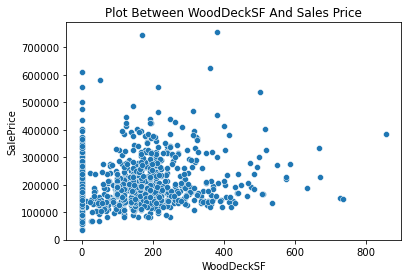

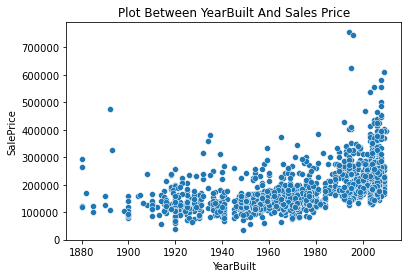

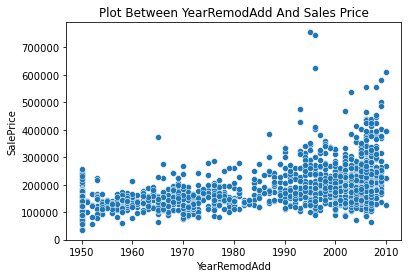

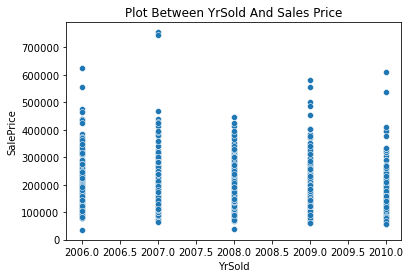

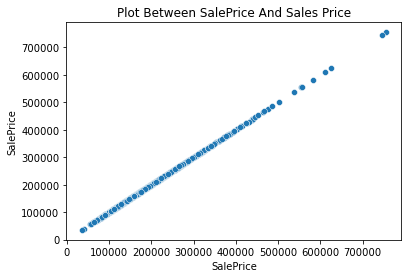

In [9]:
for col in numerical_col:
    scatterplot(housing_data_copy,col,'SalePrice')

- Analysis For Numerical columns
    - 1stFlrSF
        - It is so much in Linear relation with the SalePrice.
        - As the value increase the SalePrize also increased.
    - 1ndFlrSF
        - It is in polynomial relation with the SalePrice.
        - As the value increse the SalePrize increased Rapidly.
    - 3SsnPorch
        - Most of the Data are zero.
        - Data which are not zero, Is too much scatter.
        - No underlying pattern.
        - Choose to Drop the Column.
    - BedroomAbvGr
        - Houses having BedroomAbvGr in between 1-4 have more SalesPrice.
        - Houses having more or less BedroomAbvGr are less SalesPrice.
    - BsmtFinSF1
        - Some values are zero still have significant high SalePrice.
        - Non-Zero Values have a rising pattern as the BsmtFinSF1 increases.
    - BsmtFinSF2
        - Most values are zero and still have a lot higher SalePrice.
        - Non-Zero Values are mid-ranged SalePrice, where as zero values houses are but priced more and less.
        - SalePrice is not dependent on BsmtFinSF2.
        - Choose to drop the column.
    - BsmtFullBath
        - Houses having no or 1 BsmtFullBath are priced more than the rest.
        - It indicate having more BsmtFullBath doesn't necessarily mean to have a higher price.
    - BsmtHalfBath
        - Having 0 BsmtHalfBath have more SalePrice.
        - Values having anything more then 0 offer less maximum SalePrice but the minimum SalePrice of the house is incresed significantly.
    - BsmtUnfSF
        - Although the Data seems to be scattered, but examaning closely we can find that it is having polynomial relationship with SalePrice.
        - At first the values are constant as doesn't shows any deviation, later as the values keep increasing the SalePrice tends to increase.
    - EnclosedPorch
        - Most of the houses have no EnclosedPorch still they have a high SalePrice.
        - While those houses having a fireplace shows no change in SalePrice.
        - Choose to drop the column.
    - Fireplaces
        - Clearly visible as the number of fireplace increases the SalePrice of the house increase.
        - However the after a certain point it Started being constant and then started decreasing.
    - FullBath
        - It can be seen that the variable have a polynomial relationship with SalePrice.
        - As the values increase the SalePrice increases.
    - GarageArea
        - We can see there is gradual increase in SalePrice as the values increase.
        - And for extreme high values they decrease.
    - GarageCars
        - It can be seen that the variable have a polynomial relationship with SalePrice.
        - Minimum price of SalePrice of the houses increase with increase in values.
    - GarageYrBlt
        - Newly built are more prefered by the consumers and are more valuable than other.
        - And have more SalePrice values thean the older ones.
    - GrLivArea
        - It can be seen that the variable have a polynomial relationship with SalePrice.
        - SalePrice is in increaing pattern with the value.
    - HalfBath
        - Having 1 HalfBath have more SalePrice.
        - As number of Halfbath increases minimum SalePrice of the house also increases.
    - KitchenAbvGr
        - Haivng 1 KitchenAbvGr tends to have higher SalePrice.
        - However as number of KitchenAbvGr increases minimum SalePrice of the house also increases.
    - LotArea
        - Haivng a decent LotArea offers a high SalePrice.
        - Having too large or too short lot area offers low SalePrice.
    - LotFrontage
        - Data is concentrated to one point.
        - It doesn't affect the SalePrice much.
        - Choose to drop the column.
    - LowQualFinSF
        - Most of the data points are zero.
        - non-zero data points doesn't have any underlying pattern.
        - Choose to drop the column.
    - MSSubClass
        - The data points have too much uncertainity.
        - For low value of MSSubClass SalePrice if too low and started increasing, then falls down and started increasing again aftere some time.
        - the reason can be that it is not contributing towards the SalePrice of the houses.
        - Choose to drop the column.
    - MasVnrArea
        - Although the data points are zero.
        - but we can observe that the SalePrice is in increasing order with respect to MasVnrArea.
    - MiscVal
        - Many values are zero still the manage to get a higher SalePrice.
        - Clearly mean that this feature is not contributing towards the SalePrice.
        - Choose to drop the column.
    - MoSold
        - We can se the graph is constant for each case.
        - We cant interpret any pattern from the visulization.
        - Choose to drop the column
    - OpenPorchSF
        - Most of the values are zero.
        - for non zero values as the price increases the minimum SalePrice also increases.
    - OverallCond
        - The better the condition of the house the higher SalePrice it will be.
        - Also the minimum SalePrice of the house is also increased.
    - OverallQual
        - The Quality of house increases it increase teh SalePrice to a large extent.
        - It can be an important feature in the dataset
    - PoolArea
        - 98% of the values are zero and still have high SalePrice.
        - This is clear it is not an important predictor.
    - ScreenPorch
        - Most values are zero.
        - For Non-zero values as the value of ScreenPorch increase minimum SalePrice of the house also increases.
    - TotRmsAbvGrd
        - It can be seen that the variable have a polynomial relationship with SalePrice.
        - Also the minimum SalePrice of the house is also increased.
    - TotalBsmtSF
        - Increase in TotalBsmtSF will result in increase in SalePrice.
        - It is due to the polynomial relationship exist between them.
    - WoodDeckSF
        - Having WoodDeckSF will definitely increase the SalePrice 
        - Also the minimum SalePrice of the house is also increased.
    - YearBuilt
        - Latest bulit houses are tend to sell at higher SalePrice.
        - Also there are high number of new built houses.
    - YearRemodAdd
        - Houses with range in 1980 to 2000 are tend to have high minimum SalePrice.
        - while other for others we can see the increasing pattern in SalePrice
    - YrSold
        - We can observe that it is constant throughout.
        - Conclusively we can say it doesn't contribute in SalePrice.

In [10]:
#drop unwanted column
columns_to_drop=['3SsnPorch','BsmtFinSF2','EnclosedPorch','LotFrontage','LowQualFinSF','MSSubClass','MiscVal','MoSold','SalePrice']

In [11]:
#redefine numerical column
numerical_col = list((set(numerical_col)-set(columns_to_drop)))

In [12]:
def countplot(data,x):
    """
        function takes 
        data : Dataframe
        x : x-axis
               
        Returns
        Countplot of x
    """
    sns.countplot(data=housing_data_copy,x=x)
    plt.title('Countplot for '+x)
    plt.xticks(rotation=90)
def boxplot(data,x,y):
    """
        function takes 
        data : Dataframe
        x : x-axis
        y : y_axis
        
        Returns
        Boxplot between x and y
    """
    sns.boxplot(data=housing_data_copy,x=x,y=y)
    plt.title('Boxplot for '+x)
    plt.xticks(rotation=90)

In [13]:
#group the data of categorical columns
#if any category has less than 100 observations it will combine it under the name Others

for col in categorical_col:
    grouped = housing_data_copy.groupby(col)[col].count()
    for value in grouped.index:
        if grouped[value]<100:
            housing_data_copy[col].replace(value,'Others',inplace=True)

<ipython-input-14-b90e12ada955>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(13,6))


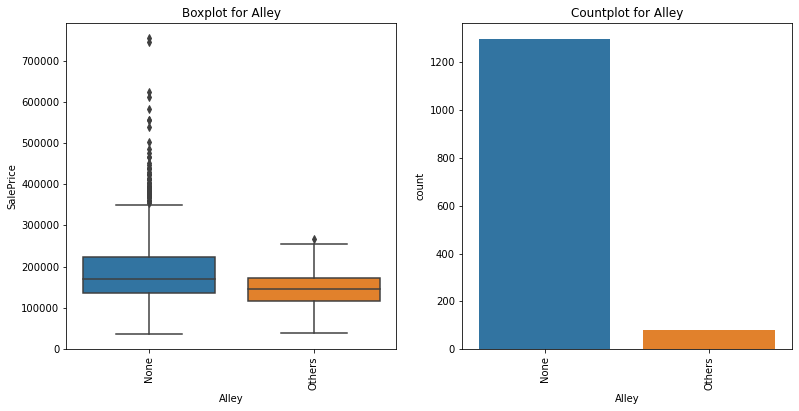

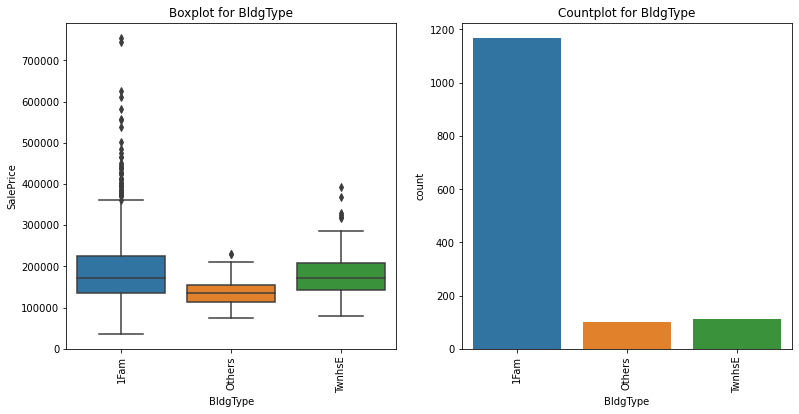

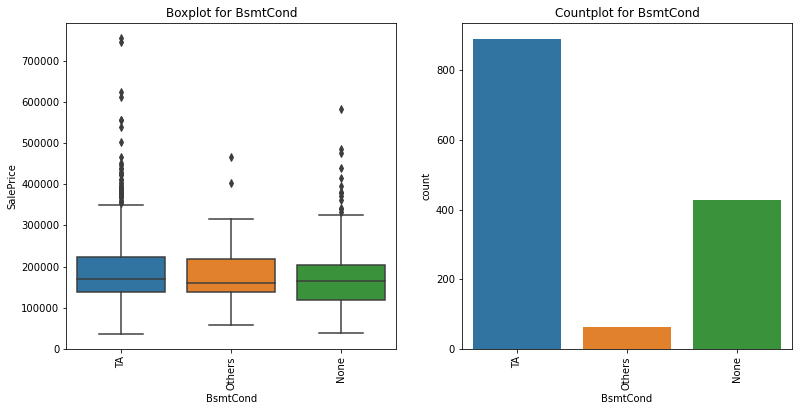

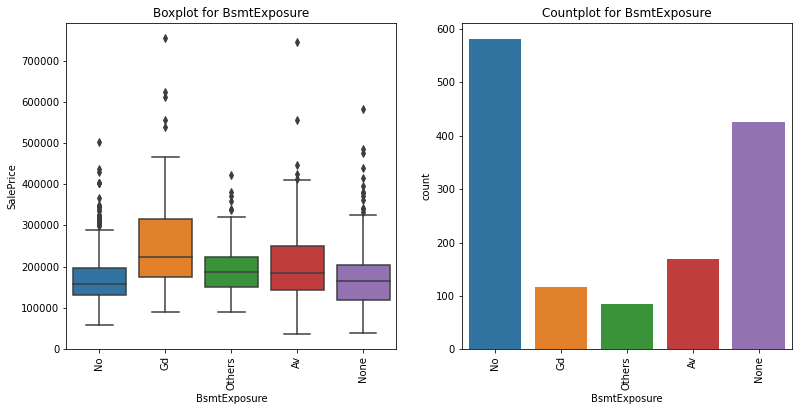

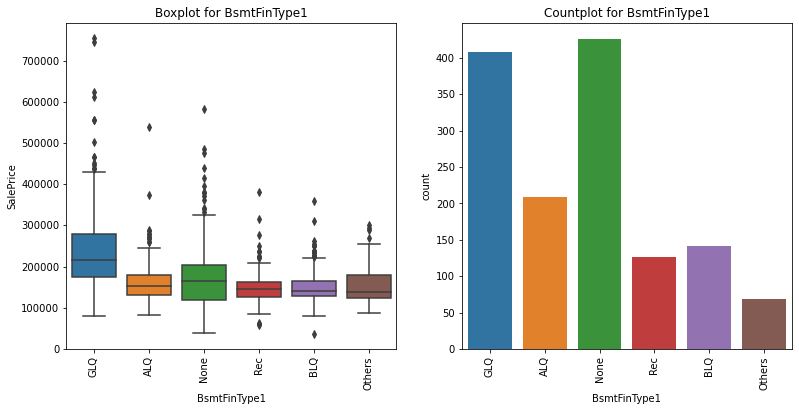

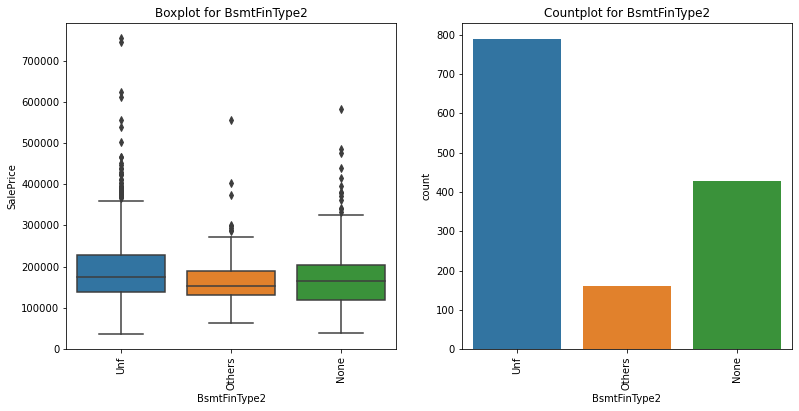

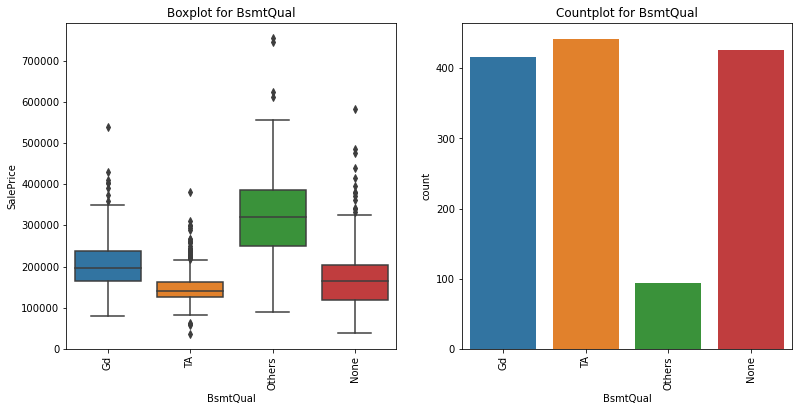

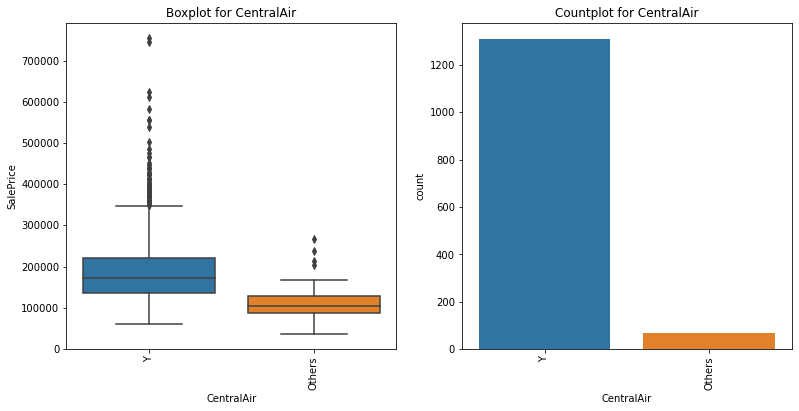

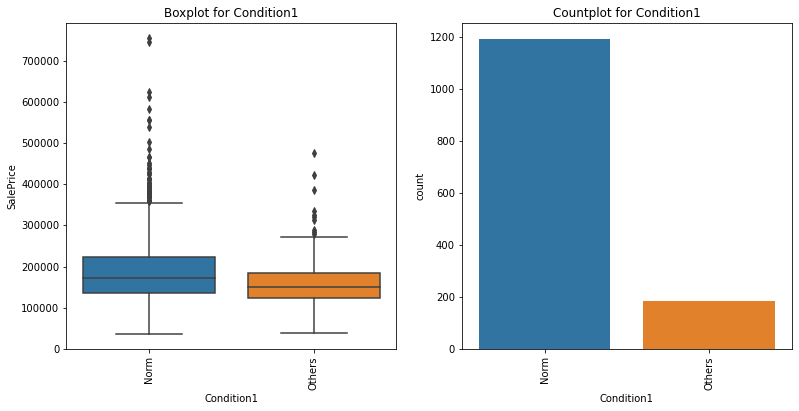

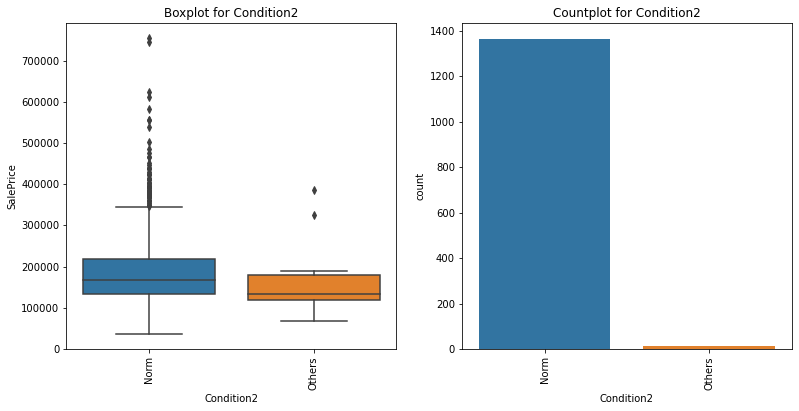

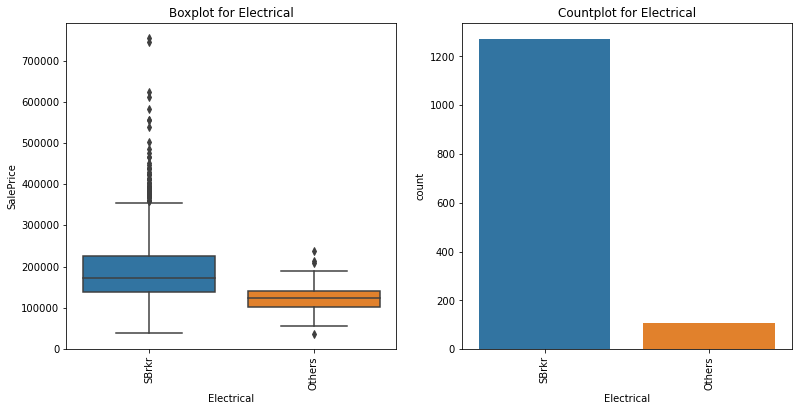

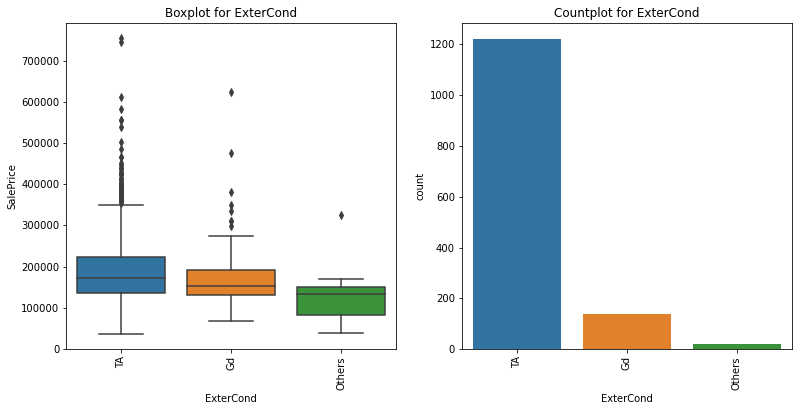

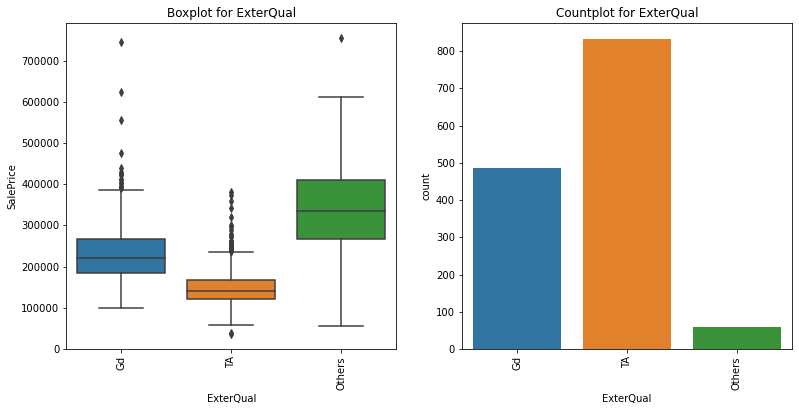

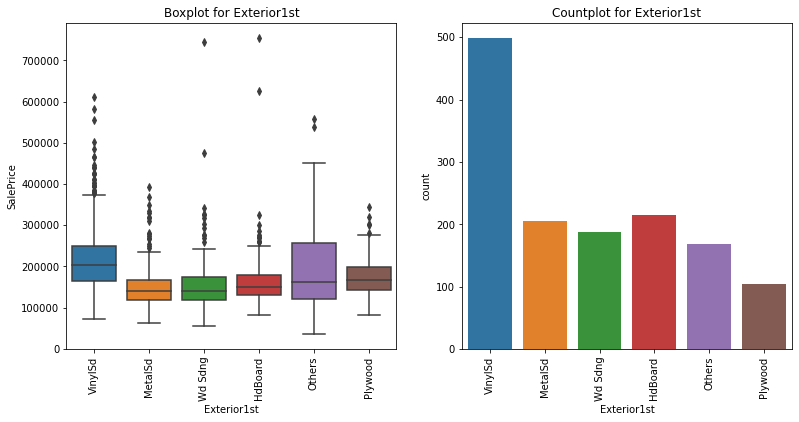

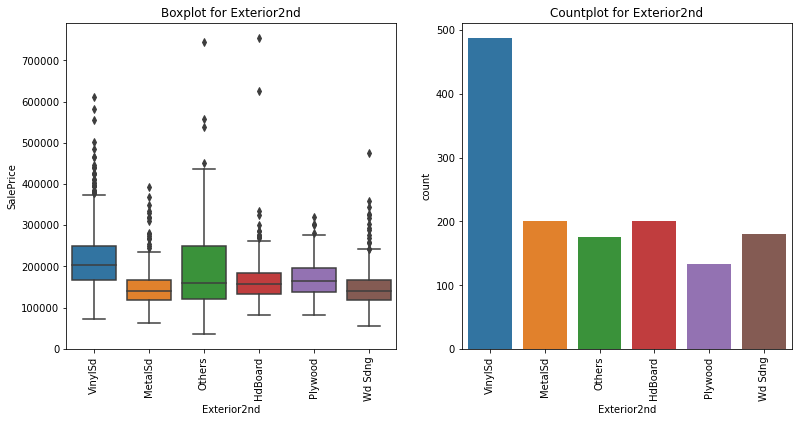

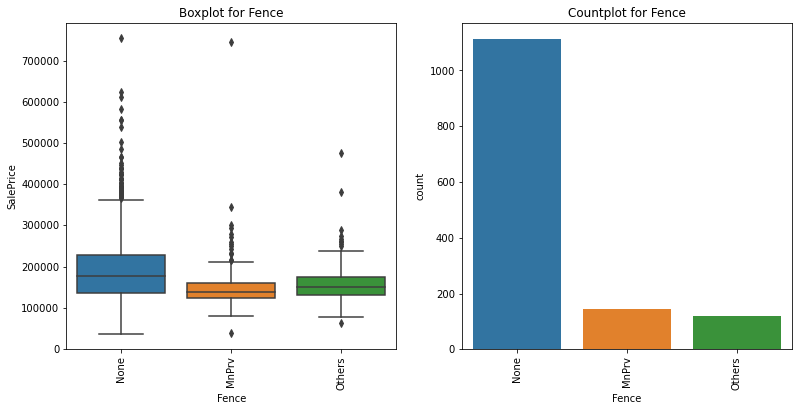

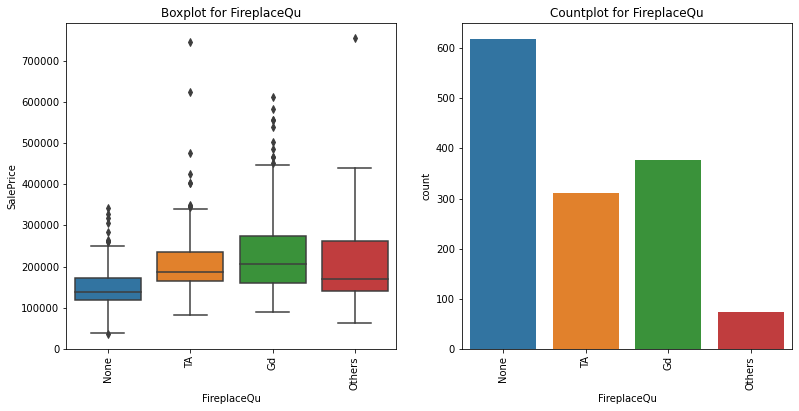

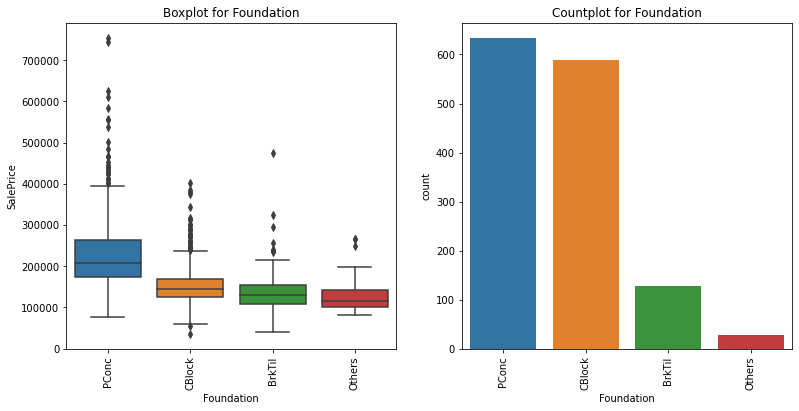

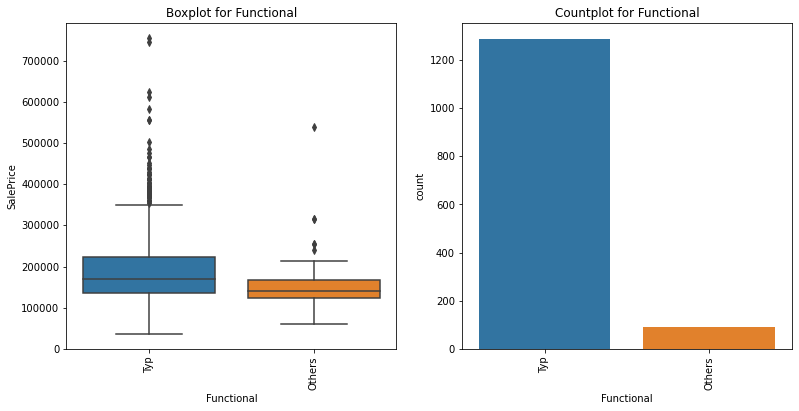

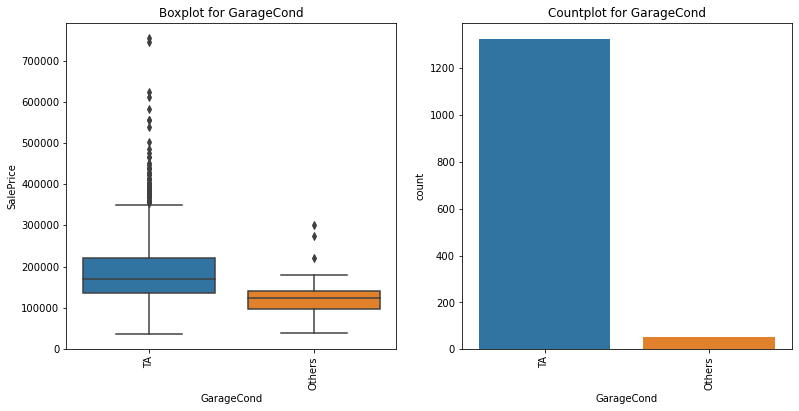

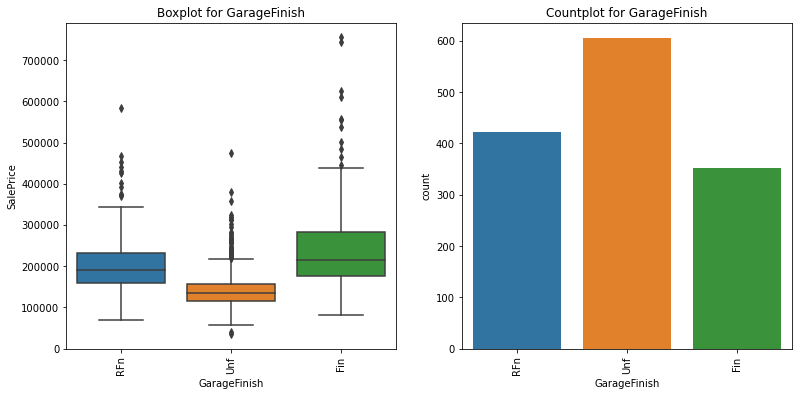

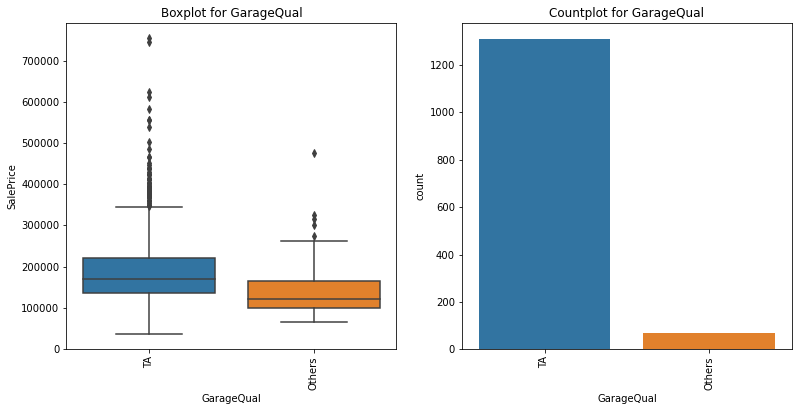

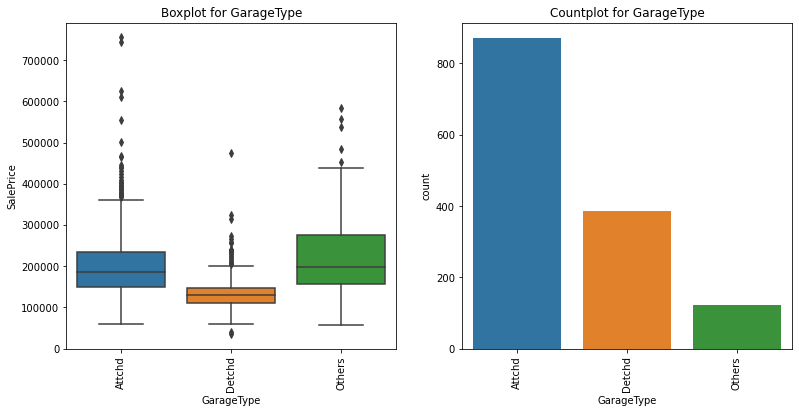

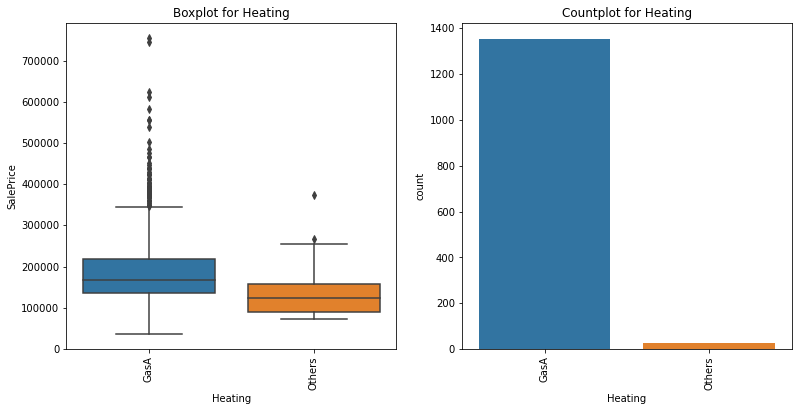

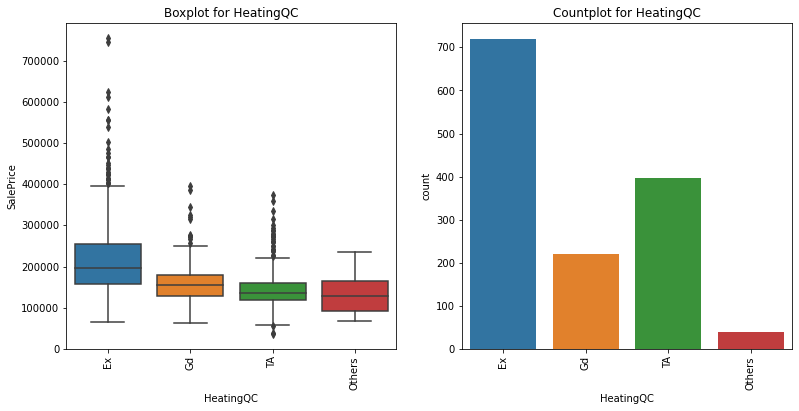

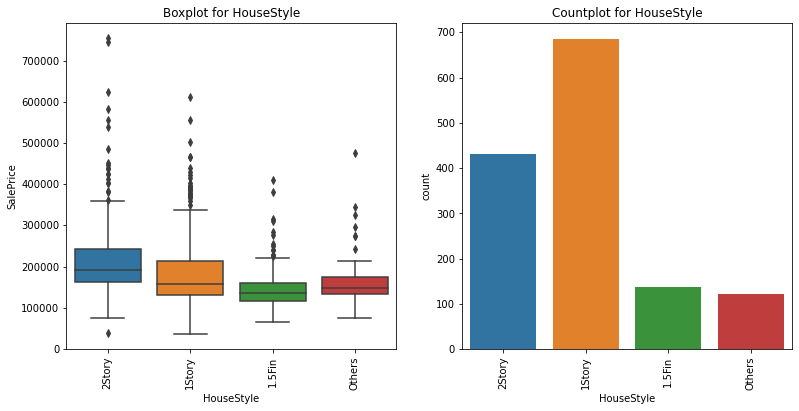

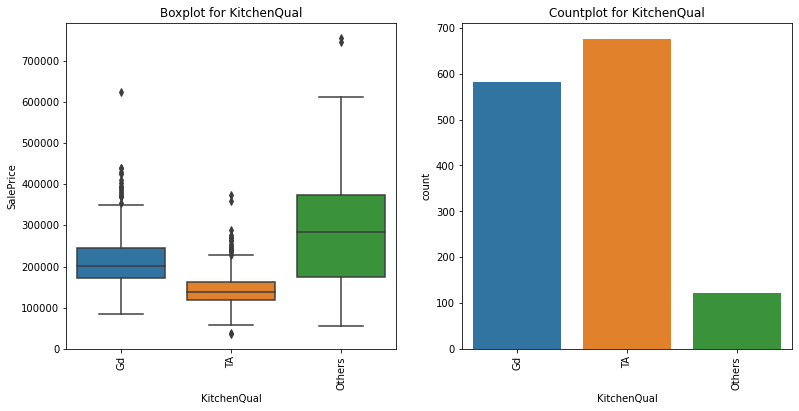

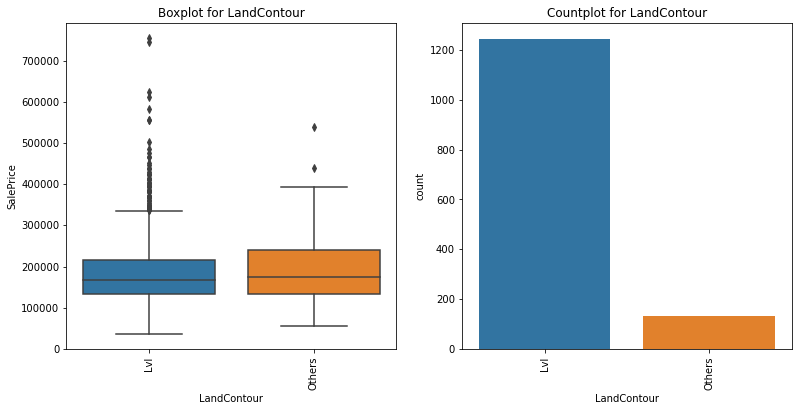

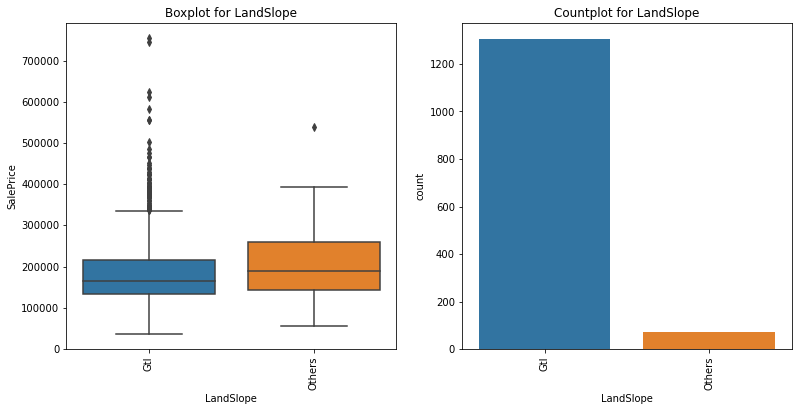

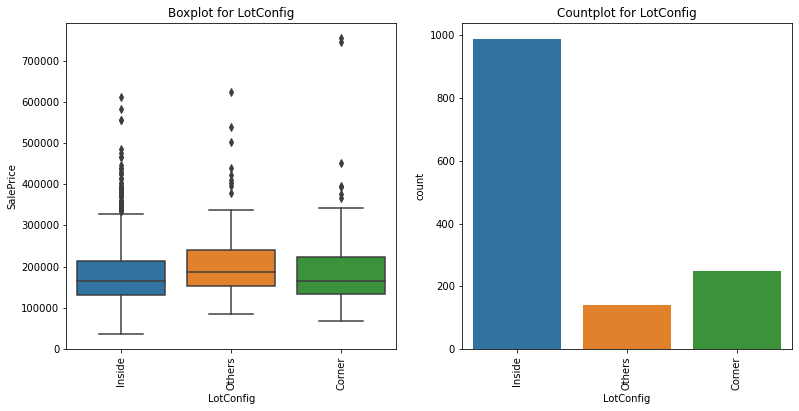

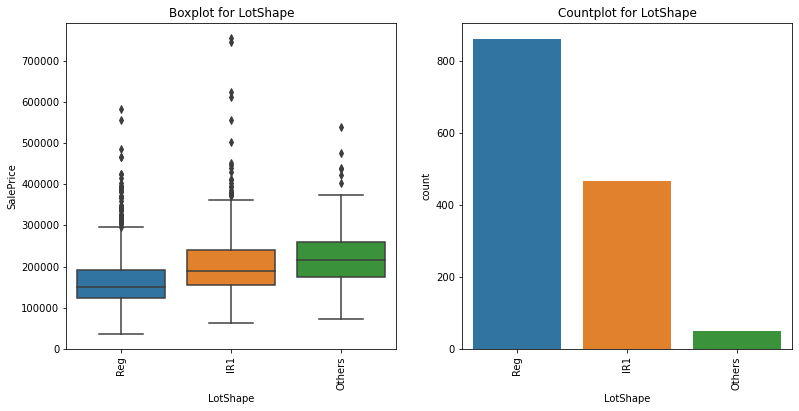

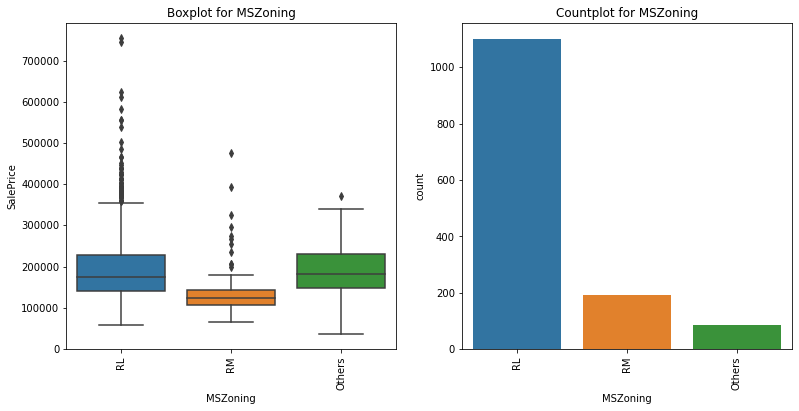

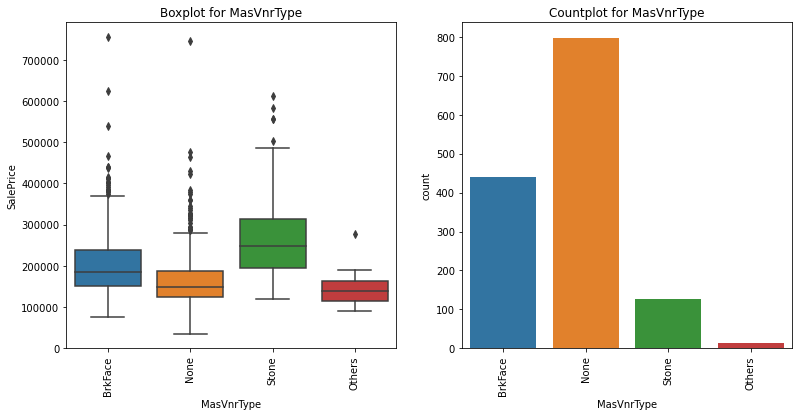

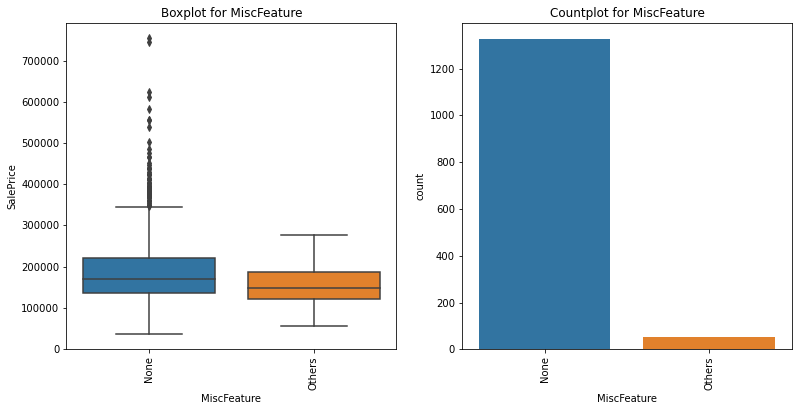

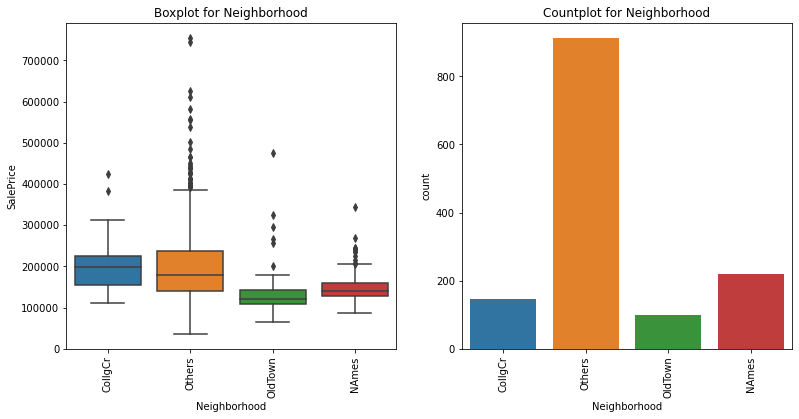

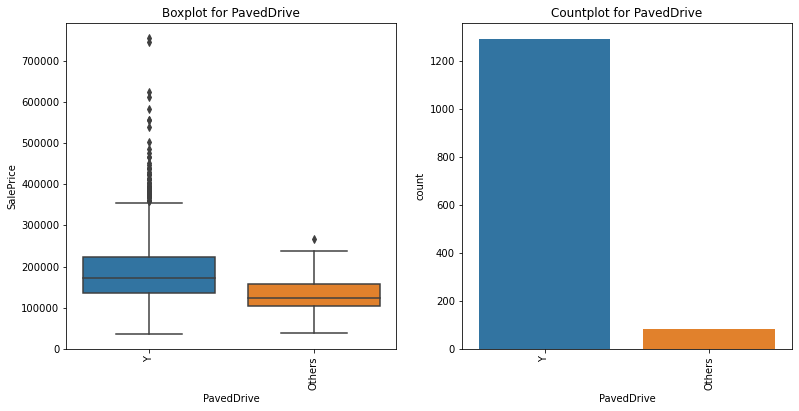

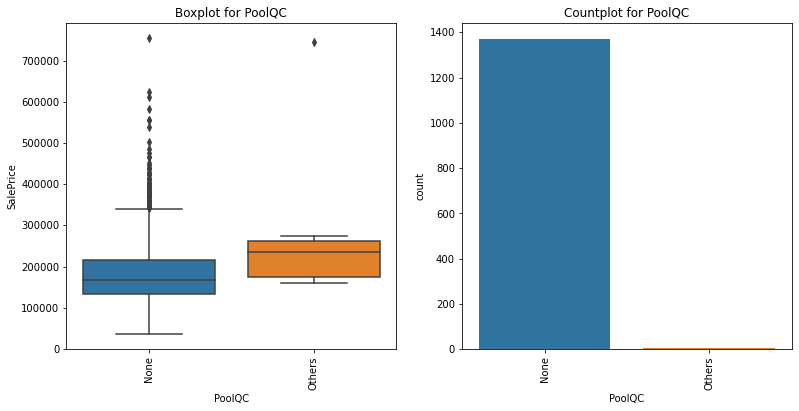

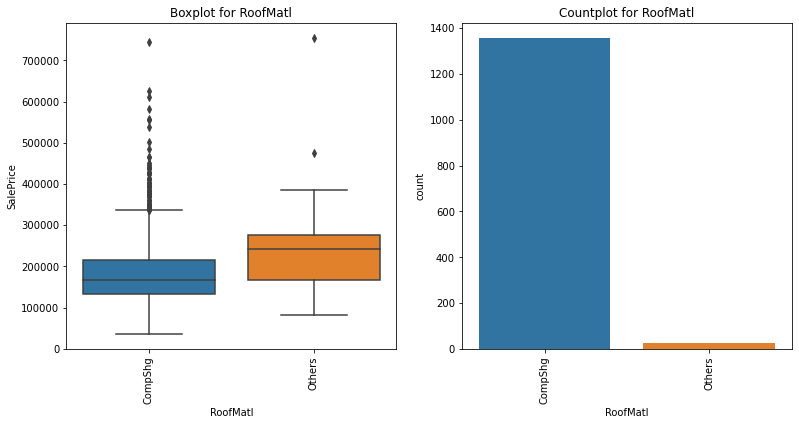

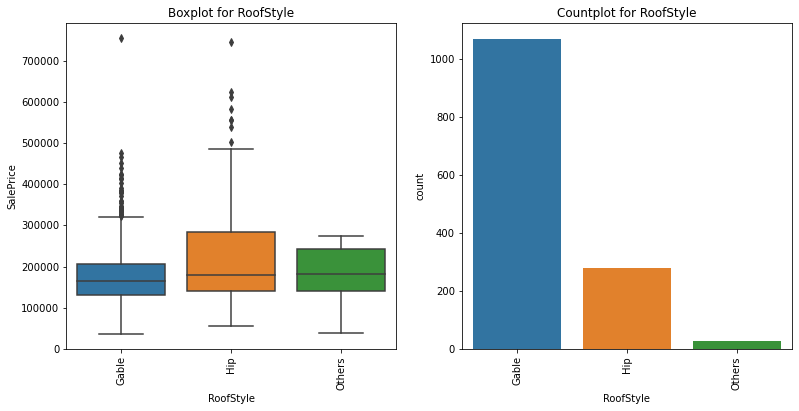

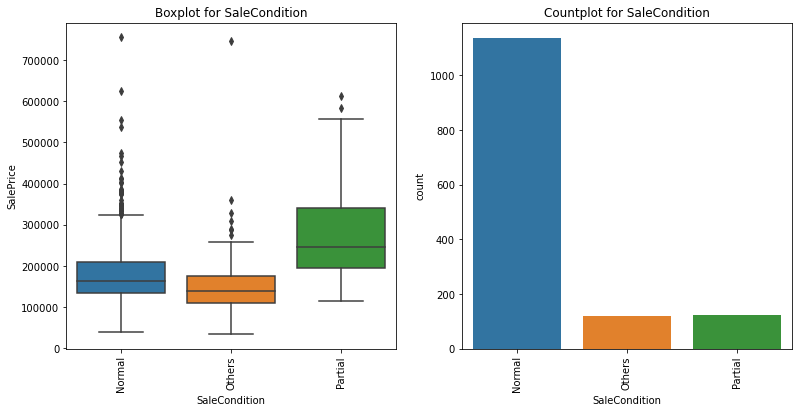

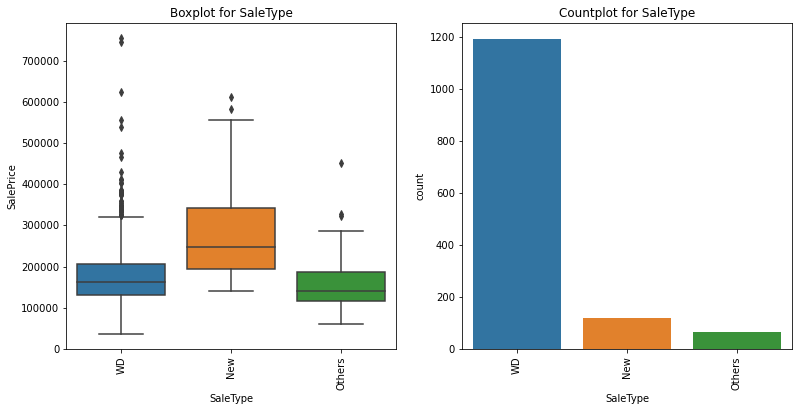

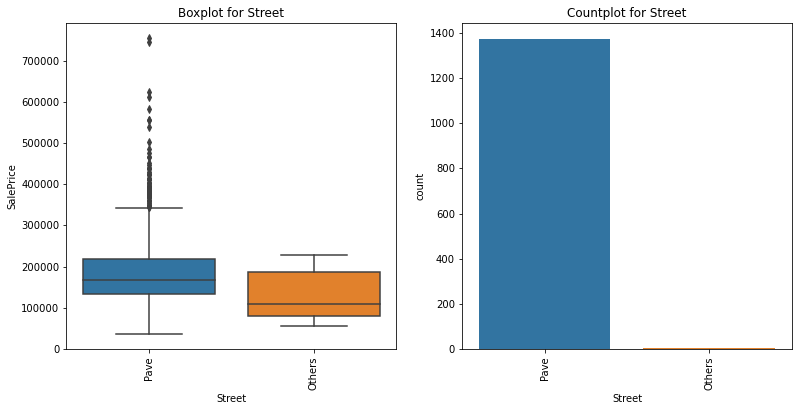

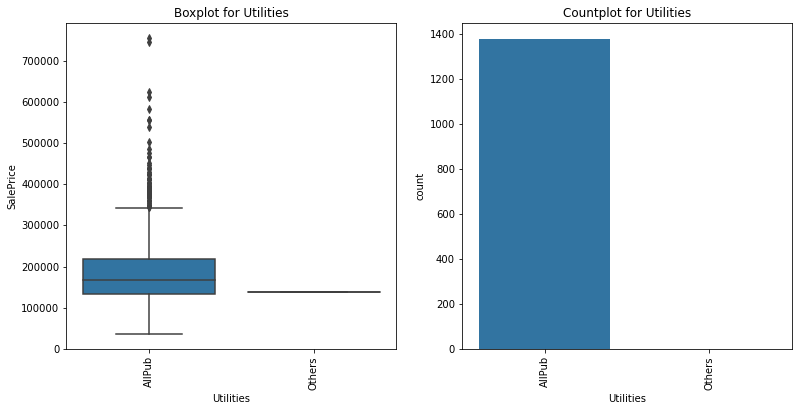

In [14]:
for col in categorical_col:
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    boxplot(housing_data_copy,col,'SalePrice')
    plt.subplot(1,2,2)
    countplot(housing_data_copy,col)

- Analysis for Categorical columns
    - Alley
        - There are so many None values which will affect its mean price to large extent.
        - It offers houses in wide range of SalePrice.
    - BldgType
        - There are too many 1Fan values which will affect its mean SalePrice to large extent.
        - Minimum SalePrice for TwnhsE is higher than others.
        - While others has the lowest mean value,
    - BsmtCond
        - For TA BsmtCond It offers a High SalePrice.
        - For category others it provides short range of SalePrice compared to others.
    - BsmtExposure
        - There are around 400 None values in the column.
        - But we can see the hike in SalePrice for the value Gd.
        - And others category proides a shorter range.
    - BsmtFinType1
        - There are a lot of None values in the column.
        - Except for value GLQ every value have nearly same mean SalePrice.
        - While it also offer wide range of SalePrice.
        - Rec offers narrow range of SalePrice.
    - BsmtFinType2
        - There are lot of outliers for the value Unf.
        - All the category have nearly same mean SalePrice.
        - Choose to drop the column.
    - BsmtQual 
        - The SalePrices for the value others is significantly higher than rest.
        - None Category offers Minimum SalePrice.
    - CentralAir
        - There are so many Y values.
        - Which will eventually affect the mean SalePrice.
        - Choose to drop the column.
    - Condition1
        - We have a lot of observation for the value Norm.
        - We can see people don't pay highe price for category others.
    - Condition2
        - Nearly all the category are Norm.
        - If we count in outliers we can see it offer both Maximum and Minimum SalePrice of the houses.
        - Choose to drop the column.
    - Electrical
        - More than 1200 values are SBrkr.
        - Also SBrkr offer both Maximum and Minimum SalePrice of the houses.
        - Choose to drop the column.
    - ExterCond
        - For Value Ta the mean value is very high.
        - On the other hand, for value Others mean is low.
        - Also Ta offers high SalePrice than rest
    - ExterQual
        - For category Others the mean value is very high.
        - For value Ta mean is low.
        - Also category others provide wide range of houses.
    - Exterior1st
        - For the category VinylSd the mean value is high.
        - While the category others provide a wide range of houses.
        - most of the categories have a closer mean value.
        - Choose to drop the column.
    - Exterior2nd
        - For the category VinylSd the mean value is high.
        - While the category others provide a wide range of houses.
        - most of the categories have a closer mean value.
        - Choose to drop the column.
    - Fence
        - Most of the values are None.
        - We can see that None offer both Maximum and Minimum SalePrice of the houses.
        - Also the mean for all the category are nearly same.
        - Choose to drop the column.
    - FireplaceQu
        - For category Gd people generally tends to pay higher prices.
        - And for category None people doesn't like to spend much.
    - Foundation
        - Most of the values are PConc and CBlock.
        - PConc have a significant rise in SalePrice.
        - As materical of Foundation changes, SalePrice also changes.
    - Functional
        - Nearly all values are Typ.
        - Mean of all the values are nearly same.
        - Choose to drop the column.
    - GarageCond
        - Nearly all the observation are valued as Ta.
        - Also Ta offer both Maximum and Minimum SalePrice of the houses.
        - While category Others offer narrow range of SalePrice.
    - GarageFinish
        - We can see for value Fin people usually spend more.
        - While for Unf people doesn't like to spend much.
    - GarageQual
        - Nearly all the observation are valued as Ta.
        - Also Ta offer both Maximum and Minimum SalePrice of the houses.
        - category Others offer narrow range of SalePrice.
    - GarageType
        - For Category people spend more, Results in high SalePrice.
        - And For Detchd people spends less.
    - Heating
        - Almost All the values are GasA.
        - We can see category Others offer a narrow price range.
        - Choose to drop the Column.
    - HeatingQC
        - The value Ex offer significantly high prices compared to others.
        - And as the quality decreases mean values also decreases.
    - HouseStyle
        - We can see HouseStyle matter in this case.
        - As the luxury increase SalePrice of the House also increase.
        - 1.5Fin houses are sold at lower prices as compared to 2story houses.
    - KitchenQual
        - For category Others people spend more, Results in high SalePrice.
        - As the Quality decrease the SalePrice also decrease.
        - And for category Ta people spend minimum.
    - LandContour
        - For category Lvl people spend less compared to category Others.
        - Also category Others offers high minimum SalePrice.
    - LandSlope
        - For category Lvl people spend less compared to category Others.
        - Also category Others offers high minimum SalePrice.
    - LotConfig
        - A large no of values are Inside.
        - Category Inside offers low SalePrice Compared to category Others and Corner.
    - LotShape
        - We can see for dofferent categories it offere different range.
        - Category Reg offers minimum SalePrice.
        - While Categories Others offers highest.
    - MSZoning
        - category Rm offers lowest mean value.
        - While category Others Provide lowest value.
        - The value RL offer wide range of SalePrice.
    - MasVnrType
        - For value None it offers low SalePrice.
        - The value Stone offer much higher upper bound for SalePrice.
        - Which means people are ready to pay higher prices for Stone.
    - MiscFeature
        - Nearly all the values are None.
        - Also None offers both minimum and maximum SalePrice, Which can't be the case if it contributing towards SalePrice.
        - Choose to drop the column.
    - Neighborhood
        - We can see some values of Neighborhood offers high SalePrice, While some offers low SalePrice.
        - Neighbourhood choice can be important for some people.
    - PavedDrive
        - More than 1200 value are Y.
        - it offers both minimum and maximum SalePrice.
        - Choose to drop the column.
    - PoolQC
        - Nearly all values are None, Reason can be most of the house not have a Pool.
        - But we can see sudden hike in SalePrice for category Others.
    - RoofMatl
        - We can see almost all the values are CompShg.
        - Also we can notice huge difference in SalePrice of category Others and CompShg.
    - RoofStyle
        - Most of the houses have RoofStyle Gable.
        - While we can see for RoofStyle Hip people generally pay higher price.
        - Also it offers wide range of SalePrice for houses.
    - SaleCondition
        - We can observe that if SaleCondition is Partial people pays too much price also the minimum price for the same if too high than others.
        - While for Others we can see it has lowest price, also narrow price range.
        - For category offers decent range of SalePrice.
    - SaleType
        - For New SalePrices are high compared to rest.
        - Also the minimum SalePrice for the same hgih compared to rest.
        - For WD, it offers wide range from low to mid range giving people more options to buy.
    - Street
        - We have only two values Pave and Others.
        - And we can see Nearly all values are Pave.
        - Which can't be an predictor for SalePrice.
        - Choose to drop the column
    - Utilities   
        - We have only two values AllPub and Others.
        - And we can see Nearly all values are AllPub.
        - Choose to drop the column

In [15]:
#Now we drop the columns we don't require
columns_to_drop.extend(['BsmtFinType2','Condition2','Electrical','Fence','Functional','MiscFeature','PavedDrive','Street','Utilities','Exterior2nd','Exterior1st','CentralAir','Heating'])

In [16]:
#redefine numerical column
categorical_col=list(set(categorical_col)-set(columns_to_drop))

In [17]:
#Now for Categorical column we should separate out the column for label Encoding and One-Hot Encoding. Because we want to work differently on both.
column_for_label_encoding=['BsmtCond','BsmtExposure','BsmtQual','Condition1','ExterCond','ExterQual','FireplaceQu','GarageQual','HeatingQC','KitchenQual','GarageCond']
column_for_hot_encoding=list(set(categorical_col)-set(column_for_label_encoding))

In [18]:
#dataframe to store out model results
Scores=pd.DataFrame(columns=['Model','Polynomial_degree','Alpha_value','Train_score(MAE)','Test_score(MAE)','R2_score(test_data)'])

###  Feature Engineering

In [19]:
# use to labal data if they are in series ('Good',  'Bad', 'Worst)
oe=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=10)

# use to hot encode the categorical data 
ohe=OneHotEncoder(handle_unknown='ignore')

# It is used to scale the numerical data 
ss=StandardScaler()

In [20]:
# Column Transformer will help use to word differently on different columns within a dataframe
transformer = ColumnTransformer(transformers=[('num',ss,numerical_col),
                                           ('ordinal',oe,column_for_label_encoding),
                                           ('hotencode',ohe,column_for_hot_encoding)])

###  Model Creation

In [21]:
# It will create folds with in our data frame so we can use them to Validate our model performance over all the present data
folds=KFold(n_splits=3,shuffle=True,random_state=10)

In [22]:
total_column=categorical_col+numerical_col

In [23]:
#Seprate out our Features and target variable
X=housing_data_copy[total_column]
y=housing_data_copy.SalePrice

####  Linear Regression

In [24]:
for deg in [1,2,3]:
    #adding polynomial expression to data
    pf=PolynomialFeatures(degree=deg)

    #model creation
    LR=LinearRegression()

    #creation of preprocessor  and pipeline
    preprocessor=Pipeline(steps=[('transform',transformer),
                                 ('polynomial',pf)])
    model_pipeline=Pipeline(steps=[('preprocess',preprocessor),
                              ('model',LR)])

    #to collect prediction scores
    train_score=[]
    test_score=[]
    r2_scores=[]

    #iterating over various folds
    for train_index,test_index in folds.split(X):
        #train and test data split
        train_X, train_y = X.iloc[train_index], y.iloc[train_index]
        test_X, test_y = X.iloc[test_index], y.iloc[test_index]

        #fit data to model
        model_pipeline.fit(train_X,train_y)

        #train and test prediction
        pred_test=model_pipeline.predict(test_X)
        pred_train=model_pipeline.predict(train_X)

        #appending the prediction score in terms of MEAN ABSOLUTE ERROR
        train_score.append(mean_absolute_error(train_y,pred_train))
        test_score.append(mean_absolute_error(test_y,pred_test))
        r2_scores.append(r2_score(test_y,pred_test))
        
    Scores=Scores.append(
        {'Model':'Linear_regression',
         'Polynomial_degree':deg,
         'Alpha_value':np.nan,
         'Train_score(MAE)': np.mean(train_score),
         'Test_score(MAE)': np.mean(test_score),
         'R2_score(test_data)': np.mean(r2_scores)},
        ignore_index=True)

In [25]:
#alpha values for Lasso and Ridge regression models
alphas=[10,0.1,0.001,1e-5,1e-9]

In [26]:
for alpha_val in alphas:
    for deg in [1,2]:
        pf=PolynomialFeatures(degree=deg)
        lasso=Lasso(alpha=alpha_val,max_iter=100000,)
        preprocessor=Pipeline(steps=[('transform',transformer),
                                     ('polynomial',pf)])
        model_pipeline=Pipeline(steps=[('preprocess',preprocessor),
                                       ('linear_model',lasso)])

        #to collect prediction scores
        train_score=[]
        test_score=[]
        r2_scores=[]
        #iterating over various folds
        for train_index,test_index in folds.split(X):
            #train and test data split
            train_X, train_y = X.iloc[train_index], y.iloc[train_index]
            test_X, test_y = X.iloc[test_index], y.iloc[test_index]
            
            #fit data to model
            model_pipeline.fit(train_X,train_y)
            
            #train and test prediction
            pred_test=model_pipeline.predict(test_X)
            pred_train=model_pipeline.predict(train_X)
            
            #appending the prediction score in terms of MEAN ABSOLUTE ERROR
            train_score.append(mean_absolute_error(train_y,pred_train))
            test_score.append(mean_absolute_error(test_y,pred_test))
            r2_scores.append(r2_score(test_y,pred_test))

        Scores=Scores.append(
            {'Model':'Lasso',
             'Polynomial_degree':deg,
             'Alpha_value':alpha_val,
             'Train_score(MAE)': np.mean(train_score),
             'Test_score(MAE)': np.mean(test_score)},
            ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51788855468.994934, tolerance: 496826222.3074235
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83038922539.78271, tolerance: 596537638.1826447
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71151155236.97931, tolerance: 626389296.2649149
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

In [27]:
for alpha_val in alphas:
    for deg in [1,2,3]:
        #adding polynomial expression to data
        pf=PolynomialFeatures(degree=deg)
        
        #model creation
        ridge=Ridge(alpha=alpha_val)
        
        #creation of preprocessor  and pipeline
        preprocessor=Pipeline(steps=[('transform',transformer),
                                     ('polynomial',pf)])
        model_pipeline=Pipeline(steps=[('preprocess',preprocessor),
                                  ('model',ridge)])
        
        #to collect prediction scores
        train_score = []
        test_score = []
        r2_scores = []
        
        #iterating over various folds
        for train_index,test_index in folds.split(X):
            #train and test data split
            train_X, train_y = X.iloc[train_index], y.iloc[train_index]
            test_X, test_y = X.iloc[test_index], y.iloc[test_index]
            
            #fit data to model
            model_pipeline.fit(train_X,train_y)
            
            #train and test prediction
            pred_test=model_pipeline.predict(test_X)
            pred_train=model_pipeline.predict(train_X)
            
            #appending the prediction score in terms of MEAN ABSOLUTE ERROR
            train_score.append(mean_absolute_error(train_y,pred_train))
            test_score.append(mean_absolute_error(test_y,pred_test))
            r2_scores.append(r2_score(test_y,pred_test))

        Scores=Scores.append(
            {'Model':'Ridge',
             'Polynomial_degree':deg,
             'Alpha_value':alpha_val,
             'Train_score(MAE)': np.mean(train_score),
             'Test_score(MAE)': np.mean(test_score),
             'R2_score(test_data)': np.mean(r2_scores)},
            ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.73384e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.33572e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.71899e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


### Model Accuracy

In [30]:
#viewing the scores of models performance and sorting it in assending order in order to get perfect model
Scores.sort_values(by=['R2_score(test_data)', 'Test_score(MAE)', 'Train_score(MAE)'], ascending=[False,True,True])

,Model,Polynomial_degree,Alpha_value,Train_score(MAE),Test_score(MAE),R2_score(test_data)
13,Ridge,1,1.000000e+01,19063.343419,2.105641e+04,7.993926e-01
16,Ridge,1,1.000000e-01,18909.777939,2.114536e+04,7.986292e-01
19,Ridge,1,1.000000e-03,18809.975723,2.122906e+04,7.810291e-01
22,Ridge,1,1.000000e-05,18808.871529,2.123218e+04,7.804203e-01
25,Ridge,1,1.000000e-09,18808.861649,2.123221e+04,7.804141e-01
0,Linear_regression,1,NaN,19362.486449,2.181854e+04,7.747944e-01
24,Ridge,3,1.000000e-05,5.438556,2.032281e+04,7.217591e-01
21,Ridge,3,1.000000e-03,5.446393,2.032206e+04,7.217515e-01
27,Ridge,3,1.000000e-09,12.919233,2.032184e+04,7.217370e-01
18,Ridge,3,1.000000e-01,6.190802,2.027302e+04,7.209680e-01
